<a href="https://colab.research.google.com/github/greengerong/awesome-llm/blob/main/colab/img/ddcolor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 环境设置

In [3]:
!git clone https://github.com/piddnad/DDColor.git
%cd /content/DDColor

!pip install -q -r requirements.txt
!python3 setup.py develop
!pip install gradio gradio_imageslider timm -q
!pip install modelscope -q

Cloning into 'DDColor'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 220 (delta 49), reused 37 (delta 34), pack-reused 154
Receiving objects: 100% (220/220), 13.34 MiB | 31.91 MiB/s, done.
Resolving deltas: 100% (70/70), done.
/content/DDColor
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:40: EasyInstallDeprecationWarning: easy_install com

# 推理

## CLI推理

In [4]:
%cd /content/DDColor
!wget https://modelscope.oss-cn-beijing.aliyuncs.com/test/images/audrey_hepburn.jpg -O audrey_hepburn.jpg

--2024-05-01 01:50:41--  https://modelscope.oss-cn-beijing.aliyuncs.com/test/images/audrey_hepburn.jpg
Resolving modelscope.oss-cn-beijing.aliyuncs.com (modelscope.oss-cn-beijing.aliyuncs.com)... 8.131.208.119
Connecting to modelscope.oss-cn-beijing.aliyuncs.com (modelscope.oss-cn-beijing.aliyuncs.com)|8.131.208.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97191 (95K) [image/jpeg]
Saving to: ‘audrey_hepburn.jpg’

audrey_hepburn.jpg  100%[===================>]  94.91K   413KB/s    in 0.2s    

2024-05-01 01:50:42 (413 KB/s) - ‘audrey_hepburn.jpg’ saved [97191/97191]



/content/DDColor


2024-05-01 01:53:45,186 - modelscope - WARNING - Model revision not specified, use revision: v1.02
2024-05-01 01:53:45,631 - modelscope - INFO - initiate model from /root/.cache/modelscope/hub/damo/cv_ddcolor_image-colorization
2024-05-01 01:53:45,633 - modelscope - INFO - initiate model from location /root/.cache/modelscope/hub/damo/cv_ddcolor_image-colorization.
2024-05-01 01:53:45,637 - modelscope - INFO - initialize model from /root/.cache/modelscope/hub/damo/cv_ddcolor_image-colorization
2024-05-01 01:53:57,012 - modelscope - INFO - Loading DDColor model from /root/.cache/modelscope/hub/damo/cv_ddcolor_image-colorization/pytorch_model.pt, with param key: [params].
2024-05-01 01:53:57,823 - modelscope - INFO - load model done.
2024-05-01 01:53:57,922 - modelscope - WARNING - No preprocessor field found in cfg.
2024-05-01 01:53:57,924 - modelscope - WARNING - No val key and type key found in preprocessor domain of configuration.json file.
2024-05-01 01:53:57,925 - modelscope - WARNI

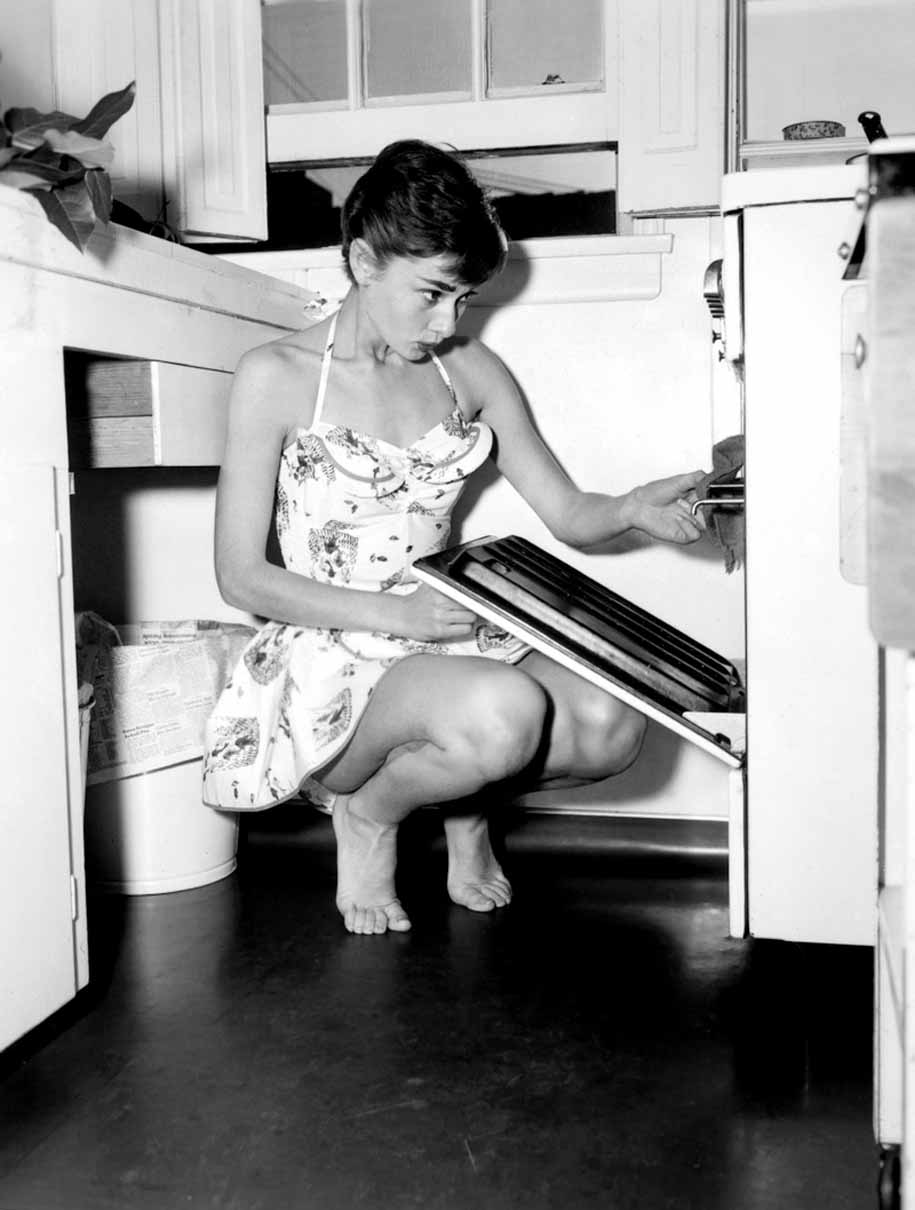

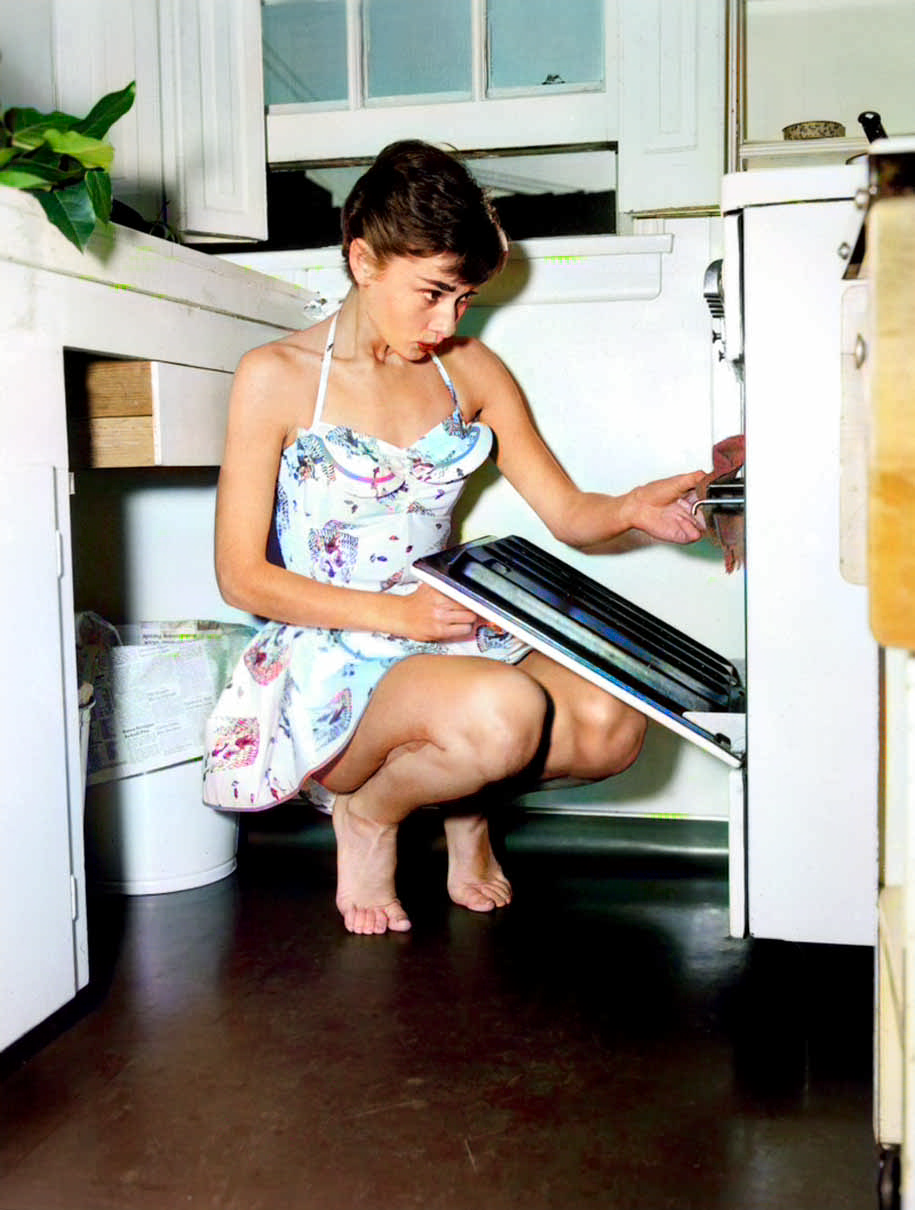

In [7]:
%cd /content/DDColor
import cv2
from modelscope.outputs import OutputKeys
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks

img_colorization = pipeline(Tasks.image_colorization, model='damo/cv_ddcolor_image-colorization')

img_path = 'audrey_hepburn.jpg'
img_out = 'result.png'
result = img_colorization(img_path)
cv2.imwrite(img_out, result[OutputKeys.OUTPUT_IMG])

from IPython.display import Image,display
display(Image(open(img_path,'rb').read()))
display(Image(open(img_out,'rb').read()))


## WebUI

In [2]:
%cd /content/DDColor
from modelscope.hub.snapshot_download import snapshot_download

model_dir = snapshot_download('damo/cv_ddcolor_image-colorization', cache_dir='./modelscope')
print('model assets saved to %s'%model_dir)

2024-05-01 01:56:56,199 - modelscope - INFO - PyTorch version 2.2.0 Found.
2024-05-01 01:56:56,206 - modelscope - INFO - TensorFlow version 2.15.0 Found.
2024-05-01 01:56:56,208 - modelscope - INFO - Loading ast index from /root/.cache/modelscope/ast_indexer
2024-05-01 01:56:56,345 - modelscope - INFO - Loading done! Current index file version is 1.14.0, with md5 bed525c68c2f10dcaf8e4e322e36e2a1 and a total number of 976 components indexed
2024-05-01 01:56:58,777 - modelscope - WARNING - Model revision not specified, use revision: v1.02
Downloading: 100%|██████████| 1.39k/1.39k [00:00<00:00, 5.53MB/s]
Downloading: 100%|██████████| 235k/235k [00:00<00:00, 1.48MB/s]
Downloading: 100%|██████████| 199k/199k [00:00<00:00, 980kB/s]
Downloading: 100%|██████████| 94.9k/94.9k [00:00<00:00, 781kB/s]
Downloading: 100%|██████████| 117k/117k [00:00<00:00, 980kB/s]
Downloading: 100%|█████████▉| 870M/870M [00:12<00:00, 74.4MB/s]
Downloading: 100%|██████████| 3.44k/3.44k [00:00<00:00, 4.20MB/s]

model assets saved to ./modelscope/damo/cv_ddcolor_image-colorization


In [4]:
# 修改gradio_app.py最后一行代码为：demo.launch(share=True)
%cd /content/DDColor
!python gradio_app.py

/content/DDColor
Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://8bf3dc1f24da74de6c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
Keyboard interruption in main thread... closing server.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2538, in block_thread
    time.sleep(0.1)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/DDColor/gradio_app.py", line 120, in <module>
    demo.launch(share=True)
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2443, in launch
    self.block_thread()
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2542, in block_thread
    self.server.close()
  File "/usr/local/lib/python3.10/dist-packages/gradio/htt